In [1]:
#### Necessary libraries ####
import numpy as np              # Numpy is the fundamental package for scientific computing in Python.
import xarray as xr
import matplotlib.pyplot as plt # Matplotlib is a scientific plotting package.
import cartopy.crs as ccrs
import cartopy
from cmocean import cm

from Functions import *

# The statement below enforces the plots to be put into this notebook, instead of in their own windows.
%matplotlib inline

In [2]:
# Load results and masks
pak = xr.open_dataset('./merged_Pakistan.nc')
aus = xr.open_dataset('./merged_Australia.nc')
sct = xr.open_dataset('./merged_Scotland.nc')

mask_pak = xr.open_dataset('./Pakistan/Mask_PakistanFlood_box_lon-180to180.nc')
mask_aus = xr.open_dataset('./Australia/mask_australia_box_lon-180to180.nc')
mask_sct = xr.open_dataset('./Scotland/mask_scotland_box_lon-180to180.nc')

In [3]:
# Select one ensemble member per method
drop_list = ["UTrack Ens1", "UTrack Ens3", "UTrack Ens4", "UTrack Ens5", 
             "FLEXPART-HAMSTER Ens1", "FLEXPART-HAMSTER Ens2", 
             "FLEXPART-HAMSTER Ens3", "FLEXPART-HAMSTER Ens4",
            ]
drop_list_TFC = ["FLEXPART-WaterSip (TFC) Ens2", "FLEXPART-WaterSip (TFC) Ens3"]  # Need to confirm this

pak = pak.drop_vars(drop_list)
aus = aus.drop_vars(drop_list).drop_vars(drop_list_TFC)
sct = sct.drop_vars(drop_list).drop_vars(drop_list_TFC)

## Absolute values of moisture sources [mm]

In [4]:
# Mean
pakm = pak.to_array(dim='mean').mean('mean')
ausm = aus.to_array(dim='mean').mean('mean')
sctm = sct.to_array(dim='mean').mean('mean')

# Standard variation
paks = pak.to_array(dim='std').std('std')
auss = aus.to_array(dim='std').std('std')
scts = sct.to_array(dim='std').std('std')

### PlateCarree projection

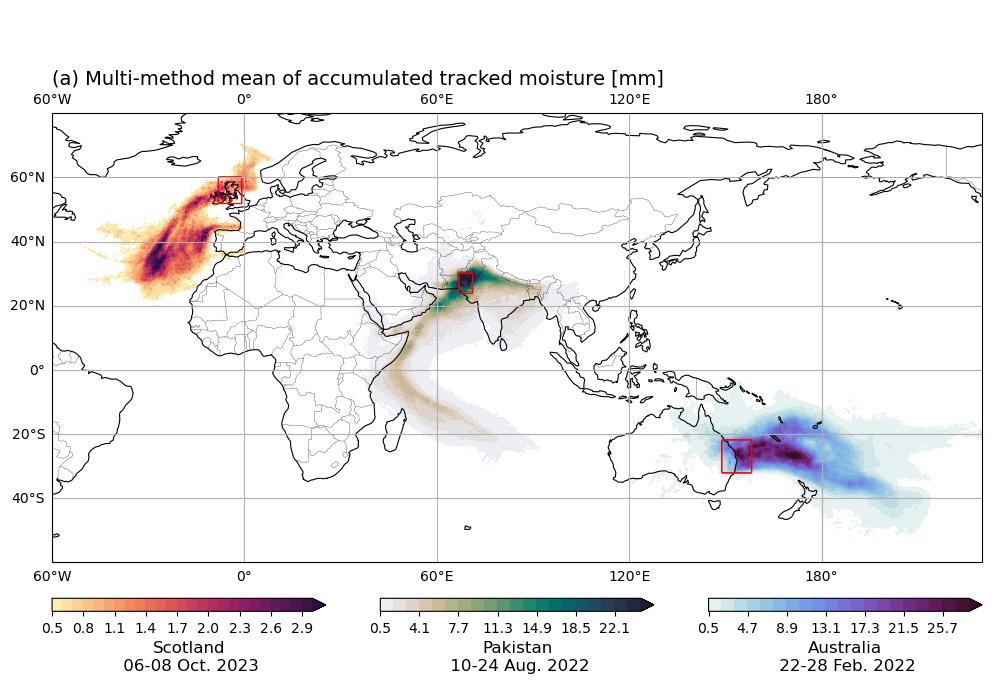

In [12]:
# MEAN
prj = ccrs.PlateCarree()
prjp = ccrs.PlateCarree(central_longitude=90)

fig, ax = plt.subplots(figsize=(12,9), subplot_kw={'projection':prjp})
pos = ax.get_position()
ax.set_position([0.125, pos.y0+0.02, 0.775, pos.height])

ax1 = fig.add_subplot(131)
ax1.set_axis_off()
ax2 = fig.add_subplot(132)
ax2.set_axis_off()
ax3 = fig.add_subplot(133)
ax3.set_axis_off()

ax.add_feature(cartopy.feature.COASTLINE, linewidth=0.8)
ax.add_feature(cartopy.feature.BORDERS, linestyle='-', linewidth=.2)

p1 = pakm.plot.contourf(ax=ax,levels=np.linspace(0.5,24.5,21), extend='max',
                   cmap = cm.rain,
                   transform=prj,
                   add_colorbar=False, 
                  )
mask_pak.mask.plot.contour(ax=ax, colors='r', linewidths=0.4, transform=prj)

p2 = ausm.plot.contourf(ax=ax,levels=np.linspace(0.5,28.5,21), extend='max',
                   cmap = cm.dense,
                   transform=prj,
                   add_colorbar=False, 
                  )
mask_aus.mask.isel(time=0, drop=True).plot.contour(ax=ax, colors='r', linewidths=0.4, transform=prj)

p3 = sctm.plot.contourf(ax=ax,levels=np.linspace(0.5,3.,26), extend='max',
                   cmap = cm.matter,
                   transform=prj,
                   add_colorbar=False, 
                  )
mask_sct.mask.isel(time=0, drop=True).plot.contour(ax=ax, colors='r', linewidths=0.4, transform=prj)

ax.set_extent([-60,230,-60,80], crs=prj)
ax.gridlines(draw_labels=True)

ax.set_title("(a) Multi-method mean of accumulated tracked moisture [mm]", fontsize=14, loc="left")

fig.colorbar(p1, ax=ax2, orientation='horizontal').set_label(label='Pakistan\n 10-24 Aug. 2022', size=12)
fig.colorbar(p2, ax=ax3, orientation='horizontal').set_label(label='Australia\n 22-28 Feb. 2022', size=12)
fig.colorbar(p3, ax=ax1, orientation='horizontal').set_label(label='Scotland\n 06-08 Oct. 2023', size=12)

### Robinson projection

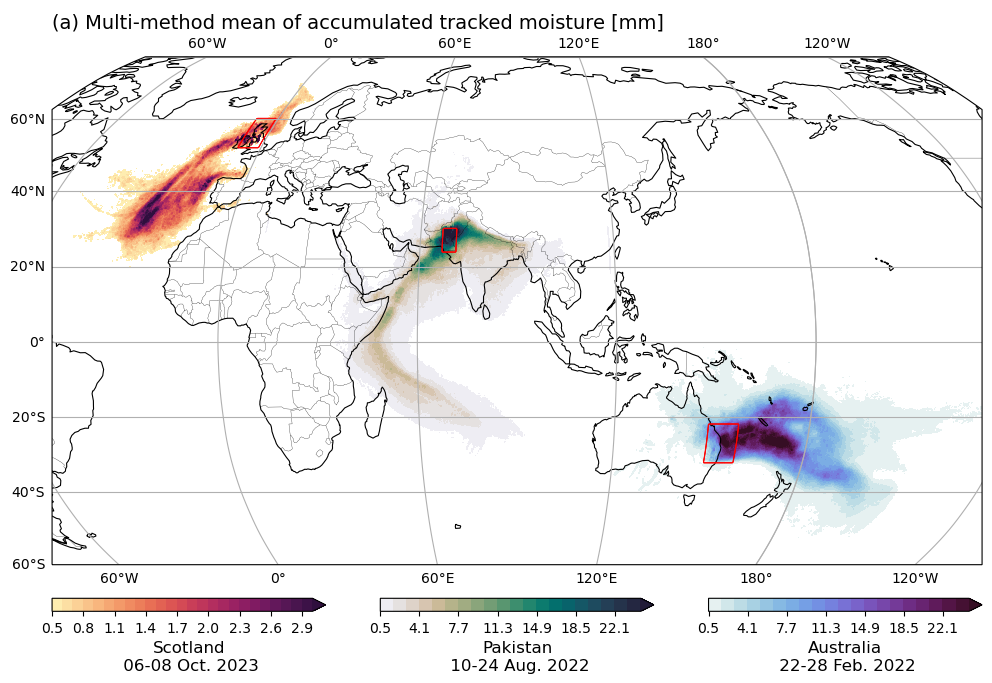

In [32]:
# MEAN
prjr = ccrs.Robinson(central_longitude=90, globe=None)
fig, ax = plt.subplots(figsize=(12,9), subplot_kw={'projection':prjr})
pos = ax.get_position()
ax.set_position([0.125, pos.y0+0.05, 0.775, pos.height])

ax1 = fig.add_subplot(131)
ax1.set_axis_off()
ax2 = fig.add_subplot(132)
ax2.set_axis_off()
ax3 = fig.add_subplot(133)
ax3.set_axis_off()

ax.add_feature(cartopy.feature.COASTLINE, linewidth=0.8)
ax.add_feature(cartopy.feature.BORDERS, linestyle='-', linewidth=.2)

p1 = pakm.plot.contourf(ax=ax, levels=np.linspace(0.5,24.5,21), extend='max',
                   cmap = cm.rain,
                   transform=prj,
                   add_colorbar=False,
                  )
mask_pak.mask.plot.contour(ax=ax, colors='r', linewidths=0.4, transform=prj)

p2 = ausm.plot.contourf(ax=ax, levels=np.linspace(0.5,24.5,21), extend='max',
                   cmap = cm.dense,
                   transform=prj,
                   add_colorbar=False,
                  )
mask_aus.mask.isel(time=0, drop=True).plot.contour(ax=ax, colors='r', linewidths=0.4, transform=prj)

p3 = sctm.plot.contourf(ax=ax, levels=np.linspace(0.5,3.,26), extend='max',
                   cmap = cm.matter,
                   transform=prj,
                   add_colorbar=False, 
                  )
mask_sct.mask.isel(time=0, drop=True).plot.contour(ax=ax, colors='r', linewidths=0.4, transform=prj)

ax.set_title("(a) Multi-method mean of accumulated tracked moisture [mm]", fontsize=14, loc="left")
ax.set_extent([-50,230,-60,80], crs=prj)
ax.gridlines(draw_labels=True)

fig.colorbar(p1, ax=ax2, orientation='horizontal').set_label(label='Pakistan\n 10-24 Aug. 2022', size=12)
fig.colorbar(p2, ax=ax3, orientation='horizontal').set_label(label='Australia\n 22-28 Feb. 2022', size=12)
fig.colorbar(p3, ax=ax1, orientation='horizontal').set_label(label='Scotland\n 06-08 Oct. 2023', size=12)

fig.savefig('Figure3a.pdf', format='pdf')

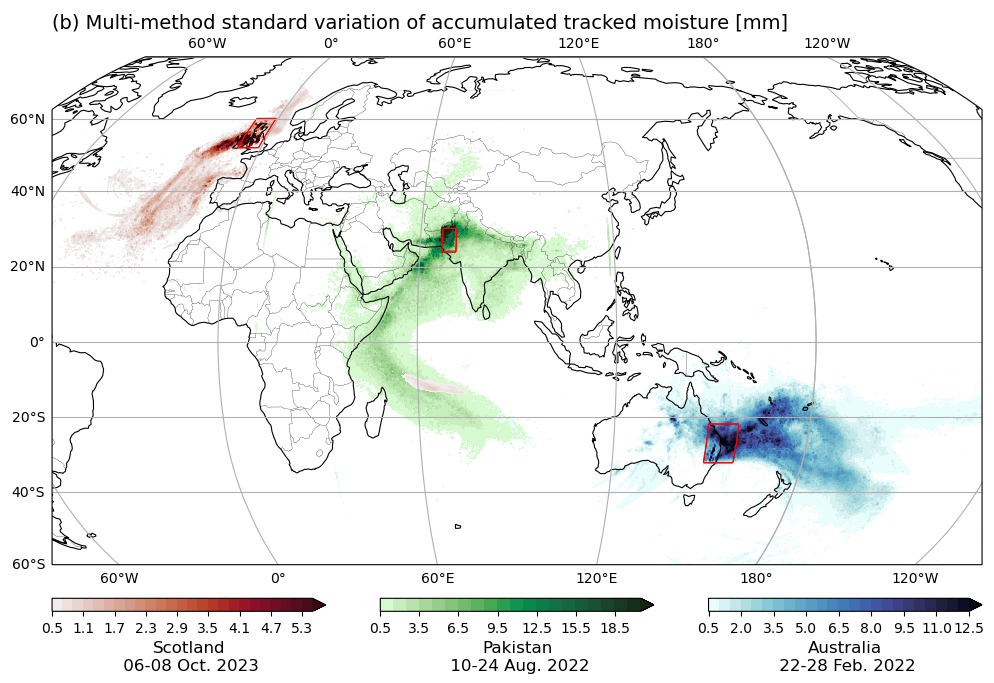

In [31]:
# STANDARD DEVIATION

prjr = ccrs.Robinson(central_longitude=90, globe=None)
fig, ax = plt.subplots(figsize=(12,9), subplot_kw={'projection':prjr})
pos = ax.get_position()
ax.set_position([0.125, pos.y0+0.05, 0.775, pos.height])

ax1 = fig.add_subplot(131)
ax1.set_axis_off()
ax2 = fig.add_subplot(132)
ax2.set_axis_off()
ax3 = fig.add_subplot(133)
ax3.set_axis_off()

ax.add_feature(cartopy.feature.COASTLINE, linewidth=0.8)
ax.add_feature(cartopy.feature.BORDERS, linestyle='-', linewidth=.2)

p1 = paks.plot.contourf(ax=ax, levels=np.linspace(0.5,20.5,21), extend='max',
                   cmap = cm.algae,
                   transform=prj,
                   add_colorbar=False,
                  )
mask_pak.mask.plot.contour(ax=ax, colors='r', linewidths=0.4, transform=prj)

p2 = auss.plot.contourf(ax=ax, levels=np.linspace(0.5,12.5,25), extend='max',
                   cmap = cm.ice_r,
                   transform=prj,
                   add_colorbar=False,
                  )
mask_aus.mask.isel(time=0, drop=True).plot.contour(ax=ax, colors='r', linewidths=0.4, transform=prj)

p3 = scts.plot.contourf(ax=ax, levels=np.linspace(0.5,5.5,26), extend='max',
                   cmap = cm.amp,
                   transform=prj,
                   add_colorbar=False, 
                  )
mask_sct.mask.isel(time=0, drop=True).plot.contour(ax=ax, colors='r', linewidths=0.4, transform=prj)

ax.set_title("(b) Multi-method standard variation of accumulated tracked moisture [mm]", fontsize=14, loc="left")
ax.set_extent([-50,230,-60,80], crs=prj)
ax.gridlines(draw_labels=True)

fig.colorbar(p1, ax=ax2, orientation='horizontal').set_label(label='Pakistan\n 10-24 Aug. 2022', size=12)
fig.colorbar(p2, ax=ax3, orientation='horizontal').set_label(label='Australia\n 22-28 Feb. 2022', size=12)
fig.colorbar(p3, ax=ax1, orientation='horizontal').set_label(label='Scotland\n 06-08 Oct. 2023', size=12)

fig.savefig('Figure3b.pdf', format='pdf')

## Relative values of moisture sources [%]

In [15]:
# Mean
pak_frac = xr.Dataset(coords=pak.coords, attrs=pak.attrs)
for ens in pak.keys():
    pak_frac[ens] = calc_fractional_sources(pak[ens])
    
aus_frac = xr.Dataset(coords=aus.coords, attrs=aus.attrs)
sct_frac = xr.Dataset(coords=sct.coords, attrs=sct.attrs)
for ens in aus.keys():  # TFC is the only difference between (Pak) and (Aus, Sct)
    aus_frac[ens] = calc_fractional_sources(aus[ens])
    sct_frac[ens] = calc_fractional_sources(sct[ens])
    
pakm_frac = pak_frac.to_array(dim='mean').mean('mean')
ausm_frac = aus_frac.to_array(dim='mean').mean('mean')
sctm_frac = sct_frac.to_array(dim='mean').mean('mean')

# Standard variation
paks_frac = pak_frac.to_array(dim='std').std('std')
auss_frac = aus_frac.to_array(dim='std').std('std')
scts_frac = sct_frac.to_array(dim='std').std('std')

### Robinson projection

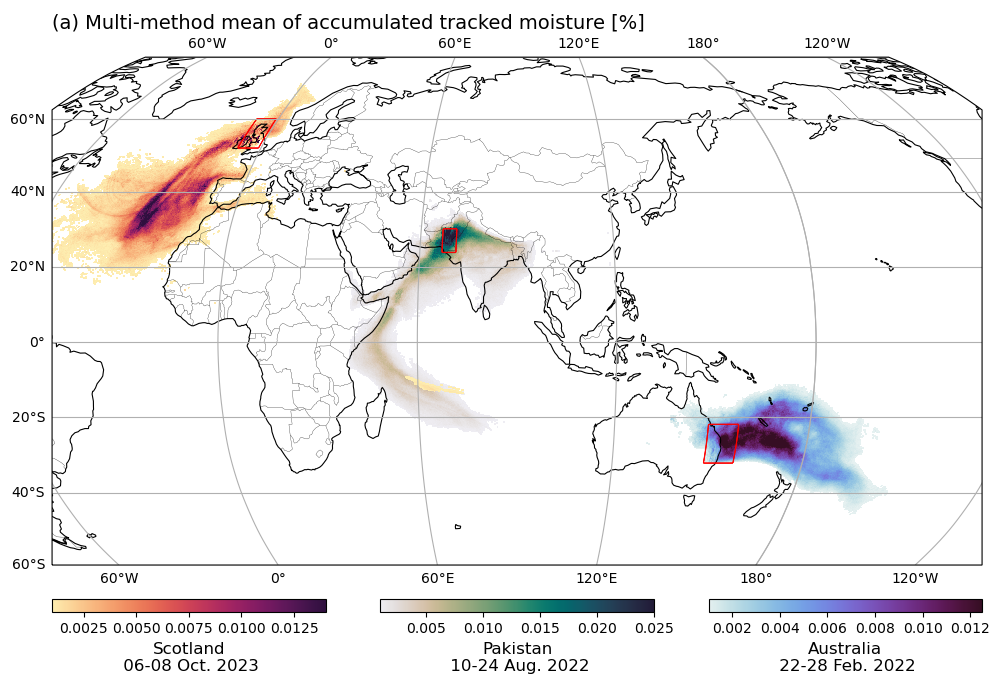

In [27]:
# MEAN
prjr = ccrs.Robinson(central_longitude=90, globe=None)
fig, ax = plt.subplots(figsize=(12,9), subplot_kw={'projection':prjr})
pos = ax.get_position()
ax.set_position([0.125, pos.y0+0.05, 0.775, pos.height])

ax1 = fig.add_subplot(131)
ax1.set_axis_off()
ax2 = fig.add_subplot(132)
ax2.set_axis_off()
ax3 = fig.add_subplot(133)
ax3.set_axis_off()

ax.add_feature(cartopy.feature.COASTLINE, linewidth=0.8)
ax.add_feature(cartopy.feature.BORDERS, linestyle='-', linewidth=.2)

ths = 0.001  # threshold for minimum value

p1 = pakm_frac.where(pakm_frac > ths).plot(ax=ax, vmin=ths, vmax=0.025,
                   cmap = cm.rain,
                   transform=prj,
                   add_colorbar=False,
                  )
mask_pak.mask.plot.contour(ax=ax, colors='r', linewidths=0.4, transform=prj)

p2 = ausm_frac.where(ausm_frac > ths).plot(ax=ax, vmin=ths, vmax=0.0125,
                   cmap = cm.dense,
                   transform=prj,
                   add_colorbar=False,
                  )
mask_aus.mask.isel(time=0, drop=True).plot.contour(ax=ax, colors='r', linewidths=0.4, transform=prj)

p3 = sctm_frac.where(sctm_frac > ths).plot(ax=ax, vmin=ths, vmax=0.014,
                   cmap = cm.matter,
                   transform=prj,
                   add_colorbar=False, 
                  )
mask_sct.mask.isel(time=0, drop=True).plot.contour(ax=ax, colors='r', linewidths=0.4, transform=prj)

ax.set_title("(a) Multi-method mean of accumulated tracked moisture [%]", fontsize=14, loc="left")
ax.set_extent([-50,230,-60,80], crs=prj)
ax.gridlines(draw_labels=True)

fig.colorbar(p1, ax=ax2, orientation='horizontal').set_label(label='Pakistan\n 10-24 Aug. 2022', size=12)
fig.colorbar(p2, ax=ax3, orientation='horizontal').set_label(label='Australia\n 22-28 Feb. 2022', size=12)
fig.colorbar(p3, ax=ax1, orientation='horizontal').set_label(label='Scotland\n 06-08 Oct. 2023', size=12)

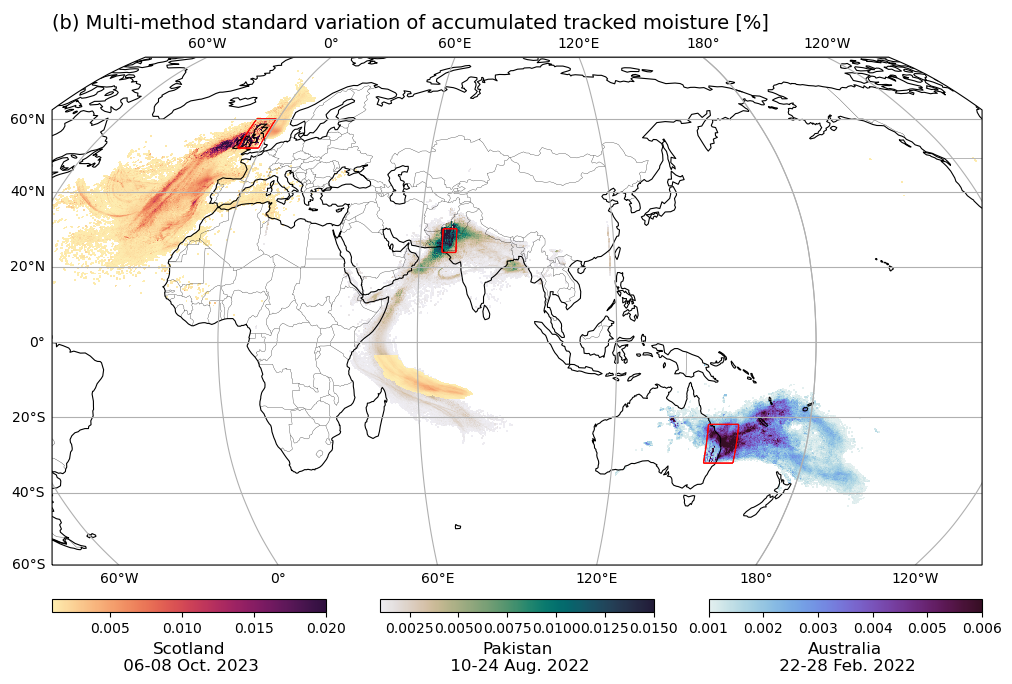

In [30]:
# STANDARD DEVIATION
prjr = ccrs.Robinson(central_longitude=90, globe=None)
fig, ax = plt.subplots(figsize=(12,9), subplot_kw={'projection':prjr})
pos = ax.get_position()
ax.set_position([0.125, pos.y0+0.05, 0.775, pos.height])

ax1 = fig.add_subplot(131)
ax1.set_axis_off()
ax2 = fig.add_subplot(132)
ax2.set_axis_off()
ax3 = fig.add_subplot(133)
ax3.set_axis_off()

ax.add_feature(cartopy.feature.COASTLINE, linewidth=0.8)
ax.add_feature(cartopy.feature.BORDERS, linestyle='-', linewidth=.2)

ths = 0.001  # threshold for minimum value

p1 = paks_frac.where(paks_frac > ths).plot(ax=ax, vmin=ths, vmax=0.015,
                   cmap = cm.rain,
                   transform=prj,
                   add_colorbar=False,
                  )
mask_pak.mask.plot.contour(ax=ax, colors='r', linewidths=0.4, transform=prj)

p2 = auss_frac.where(auss_frac > ths).plot(ax=ax, vmin=ths, vmax=0.006,
                   cmap = cm.dense,
                   transform=prj,
                   add_colorbar=False,
                  )
mask_aus.mask.isel(time=0, drop=True).plot.contour(ax=ax, colors='r', linewidths=0.4, transform=prj)

p3 = scts_frac.where(scts_frac > ths).plot(ax=ax, vmin=ths, vmax=0.02,
                   cmap = cm.matter,
                   transform=prj,
                   add_colorbar=False, 
                  )
mask_sct.mask.isel(time=0, drop=True).plot.contour(ax=ax, colors='r', linewidths=0.4, transform=prj)

ax.set_title("(b) Multi-method standard variation of accumulated tracked moisture [%]", fontsize=14, loc="left")
ax.set_extent([-50,230,-60,80], crs=prj)
ax.gridlines(draw_labels=True)

fig.colorbar(p1, ax=ax2, orientation='horizontal').set_label(label='Pakistan\n 10-24 Aug. 2022', size=12)
fig.colorbar(p2, ax=ax3, orientation='horizontal').set_label(label='Australia\n 22-28 Feb. 2022', size=12)
fig.colorbar(p3, ax=ax1, orientation='horizontal').set_label(label='Scotland\n 06-08 Oct. 2023', size=12)